In [1]:
from __future__ import print_function
__author__='Jianghao, PUI CUSP 2016'

import pylab as pl
from scipy.optimize import curve_fit, minimize
import numpy as np
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1. Chi Sq Distribution

In [2]:
np.random.seed(999)

In [3]:
popMean = 100

In [4]:
md = {}
md['chisq'] = np.random.chisquare(popMean,size=100)

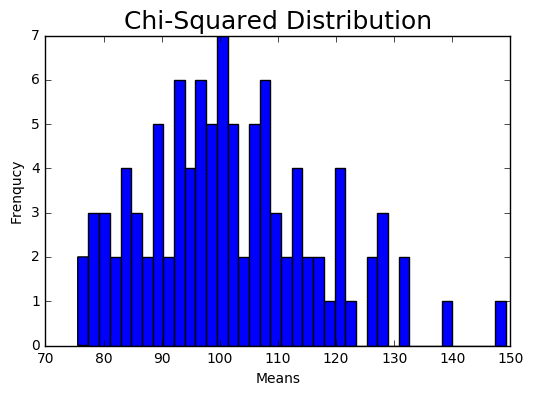

In [5]:
pl.hist(md['chisq'], bins=40)
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Chi-Squared Distribution', fontsize=18)

## Figure C1: Chi-Squared distribution: mean = 100, N = 100

In [6]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.75, standard deviation: 14.94


In [7]:
sizeArray = np.linspace(10, 2000, 100).astype(int)
print (type(sizeArray), sizeArray.shape)

<type 'numpy.ndarray'> (100,)


In [8]:
#redefine 'chisq' list in md dictionary
md['chisq'] = {}
for n in sizeArray:
    md['chisq'][n] = np.random.chisquare(popMean, size = n)

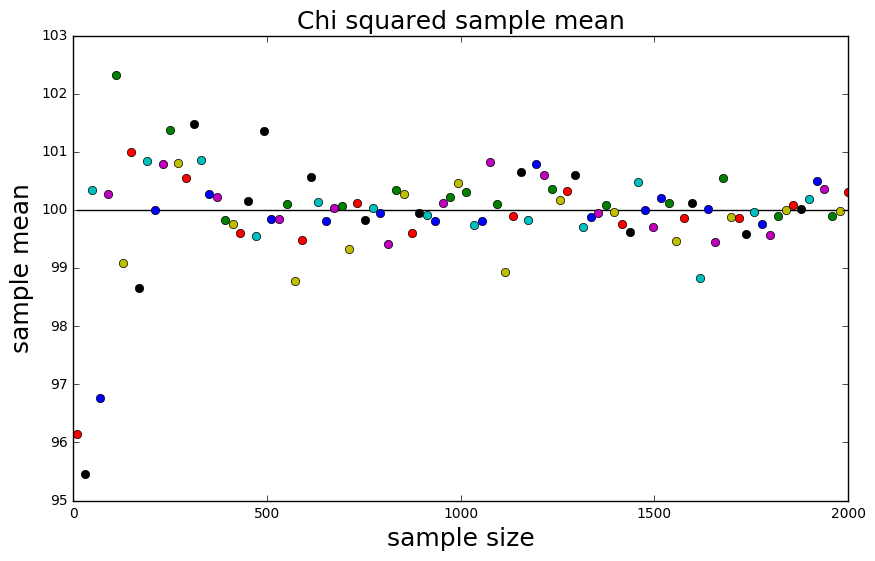

In [9]:
# create an empty arry for means of each sample
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Chi squared sample mean', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [popMean, popMean],'k')


for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure C2: Chi-Squared Sample Mean

## From the figure we can see the sample mean is getting close to 100, which is the mean of the chi square distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

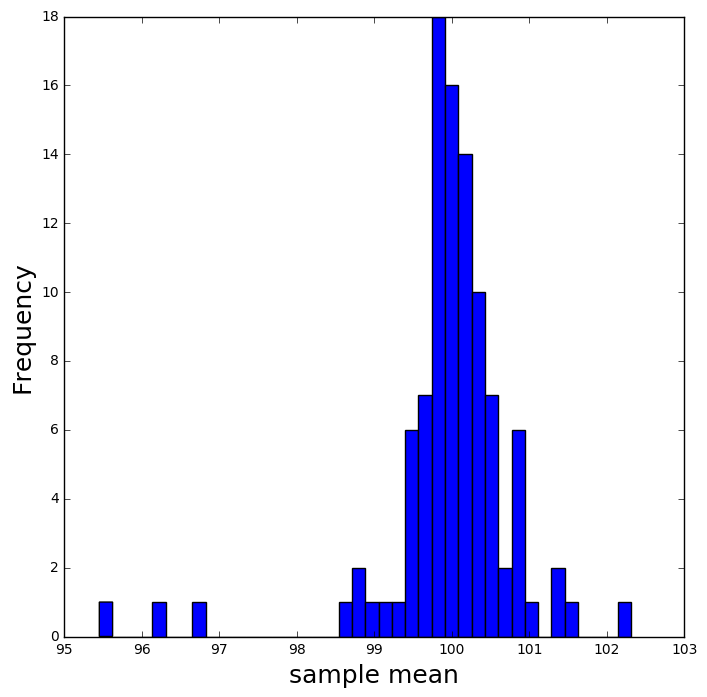

In [10]:
allmeans = list(md['chisq']['means'].values())
c_allmeans = allmeans
#print (allmeans)
pl.figure(figsize=(8, 8))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)

### Figure C3: Sample Means Distribution of Chi-Squared

## From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal.  We conclude our experiment is in compliance with Central Limit Theorem.

## 2. Normal Distribution

In [11]:
md = {}
md['normal'] = np.random.normal(popMean, scale=100, size=100)

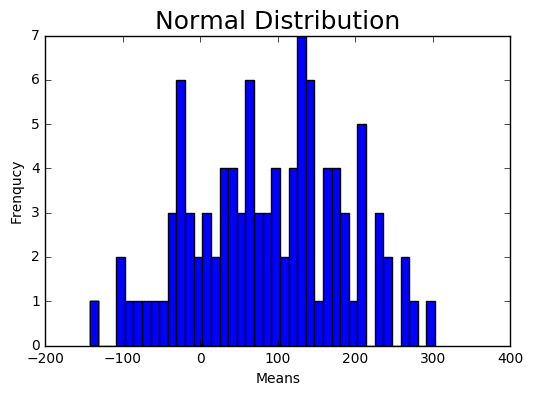

In [12]:
pl.hist(md['normal'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Normal Distribution', fontsize=18)

##  Figure 1: one sample of Normal distribution: mean=100, scale=100, N=100

In [13]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['normal'].mean(), md['normal'].std()))

Normal mean: 88.39, standard deviation: 96.89


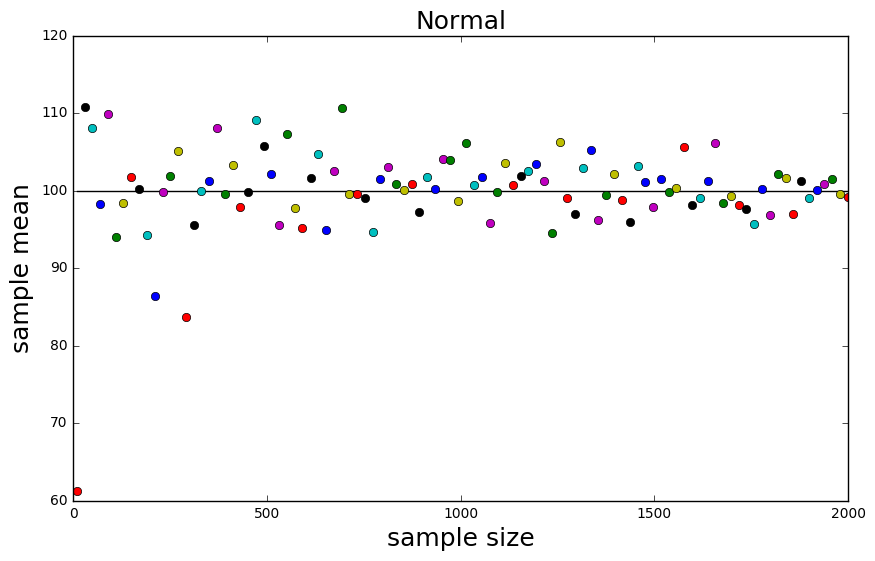

In [14]:
md['normal'] = {} 

for n in sizeArray:
    md['normal'][n] = np.random.normal(popMean, scale = 100, size = n)
       

md['normal']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Normal', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [popMean,popMean], 'k')
for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        

##  Figure N2: Normal Sample means of 

## From the figure we can see the sample mean is getting close to 100, which is the mean of the normal distribution we set before, as the sample size is getting larger. It is in compliance with the law of large numbers.

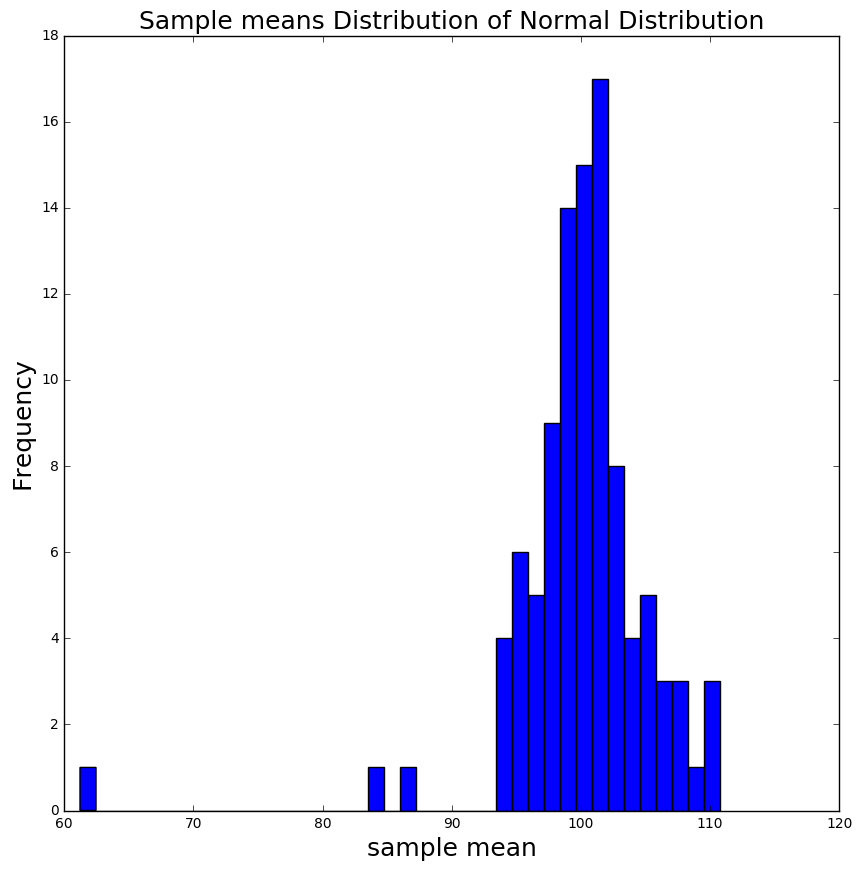

In [15]:
allmeans = list(md['normal']['means'].values())
n_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means Distribution of Normal Distribution', fontsize=18)

## Figure N3: Sample means Distribution of Normal Distribution

## From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 3 Poisson Distribution

In [16]:
lam = popMean
# In poisson distribution, the lam equals to the mean!
md = {}
md['poisson'] = np.random.poisson(lam, size=100)

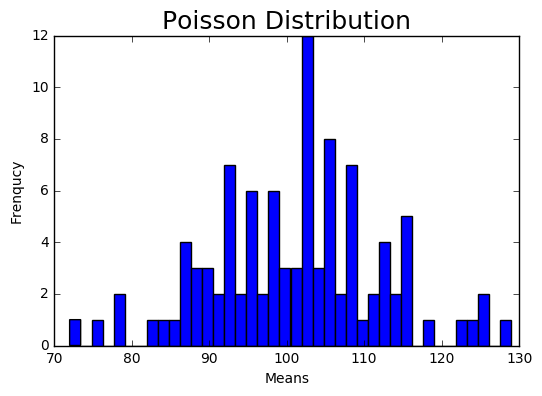

In [17]:
pl.hist(md['poisson'], bins = 40)

pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Poisson Distribution', fontsize=18)

##  Figure P1: Poisson distribution: lam=100, N=100

In [18]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['poisson'].mean(), md['poisson'].std()))

Poisson mean: 101.07, standard deviation: 10.98


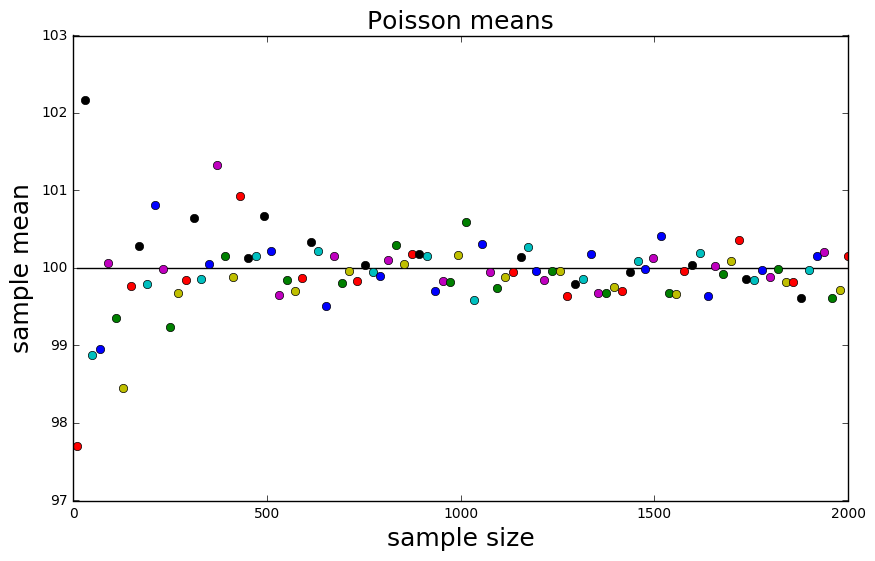

In [19]:
md['poisson'] = {} 

for n in sizeArray:
    md['poisson'][n] = np.random.poisson(lam, size = n)
       

md['poisson']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)
axchisq_mu_n.set_title('Poisson means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [lam,lam], 'k')
for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        

## Figure P2: Poisson Sample means

## From the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size getting larger. It is in compliance with the law of large numbers.

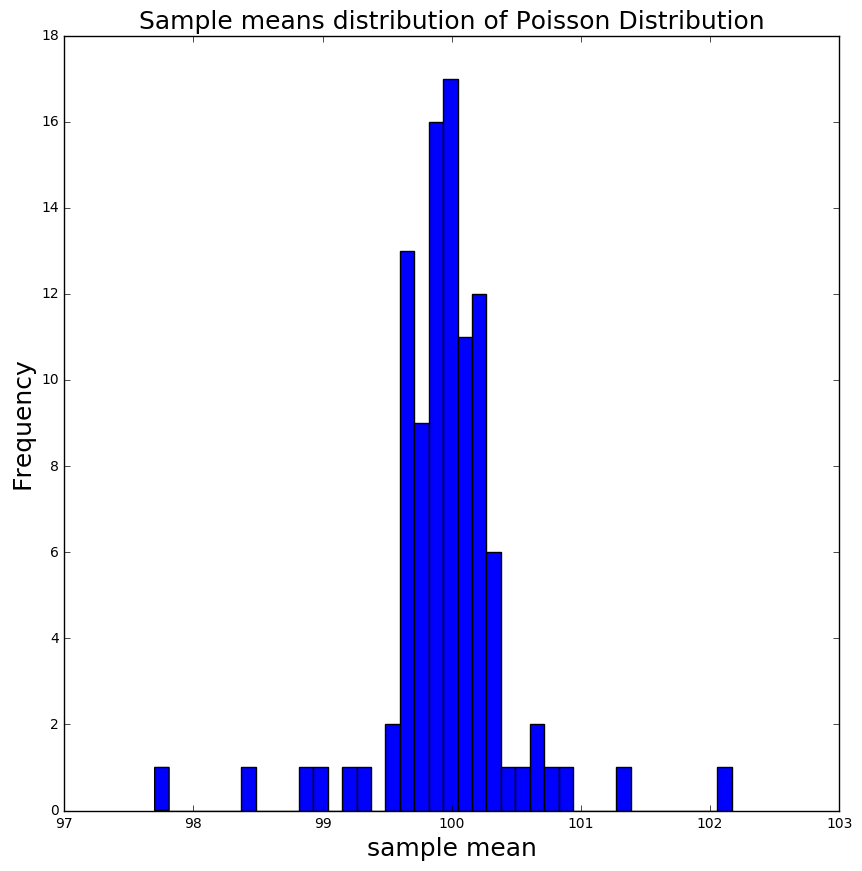

In [20]:
allmeans = list(md['poisson']['means'].values())
p_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Poisson Distribution', fontsize=18)

## Figure P3: Sample means distribution of Poisson Distribution

## From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 4. Binomial Distribution

In [21]:
n = 1000
p = 0.1
# In binomial distribution, the result of n*p equals to the mean!
md = {}
md['binomial'] = np.random.binomial(n, p, size=100)

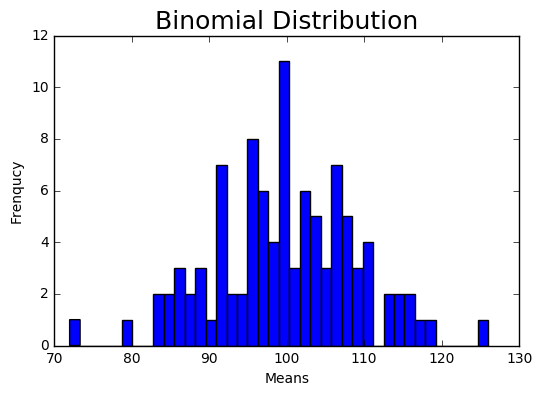

In [22]:
pl.hist(md['binomial'], bins = 40)
pl.ylabel('Frenqucy')
pl.xlabel('Means')
pl.title('Binomial Distribution', fontsize=18)

##  Figure B1: Binormal distribution: n=1000, p=0.1, N=100

In [23]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.84, standard deviation: 9.24


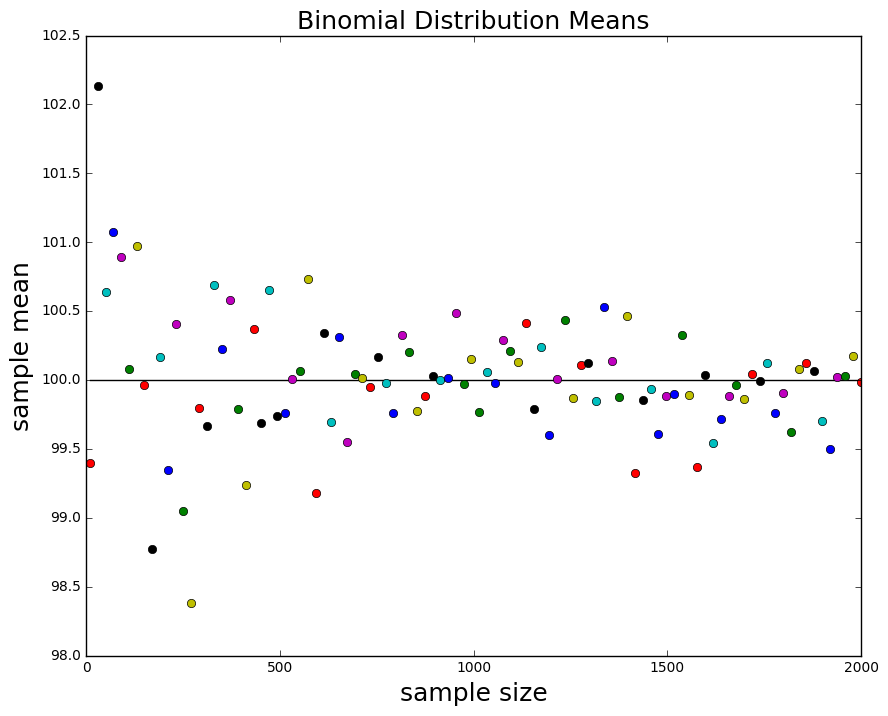

In [24]:
md['binomial'] = {} 

for x in sizeArray:
    md['binomial'][x] = np.random.binomial(n, p, size = x)
       

md['binomial']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)
axchisq_mu_n.set_title('Binomial Distribution Means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [n*p,n*p], 'k')
for xx in md['binomial']:
    if not type(xx) == str:
        md['binomial']['means'][xx] = md['binomial'][xx].mean()
        
        axchisq_mu_n.plot(xx, md['binomial']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## Figure B2: Sample means of Binomial distribution 

## from the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

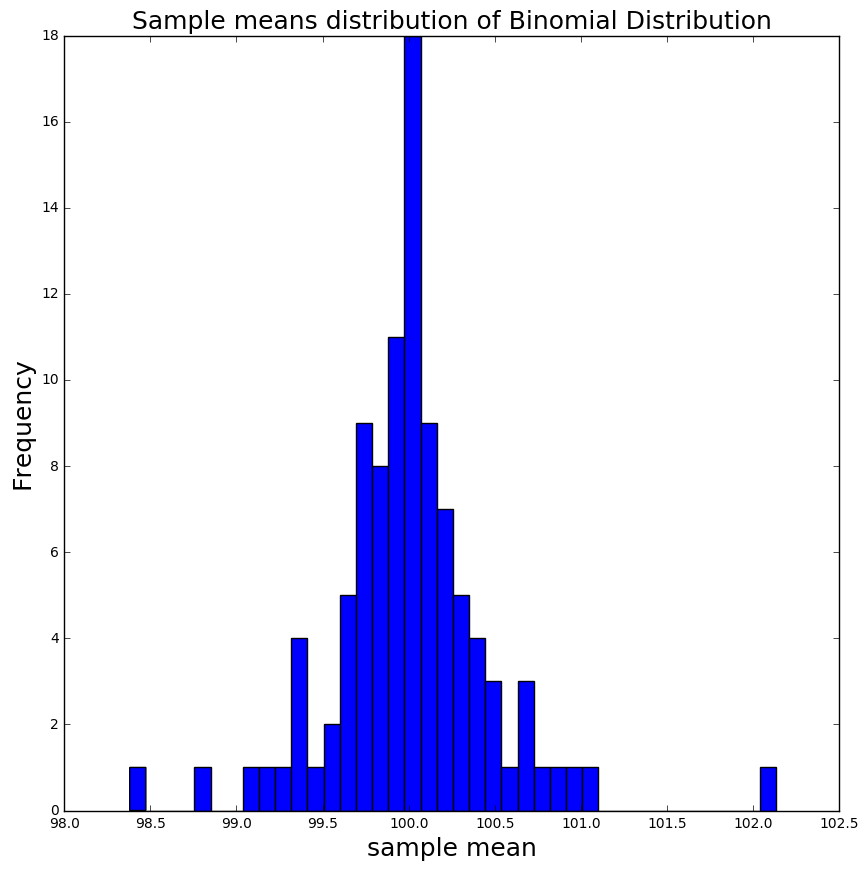

In [25]:
allmeans = list(md['binomial']['means'].values())
b_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Binomial Distribution', fontsize=18)

## Figure B3: Sample means distribution of Binomial Distribution

## From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

## 5. Exponential Distribution

In [26]:
scale=100
md = {}
md['exponential'] = np.random.exponential(scale, size=100)

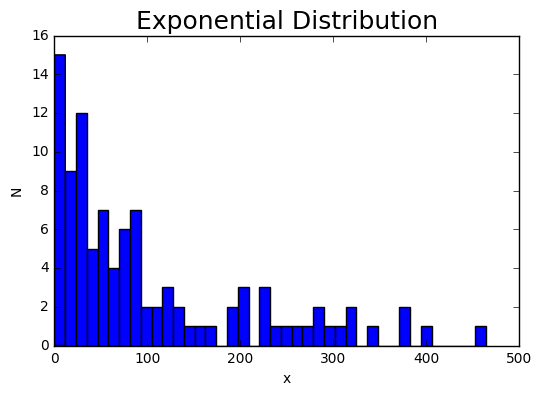

In [27]:
pl.hist(md['exponential'], bins = 40)
pl.ylabel('N')
pl.xlabel('x')
pl.title('Exponential Distribution', fontsize=18)

In [28]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['exponential'].mean(), md['exponential'].std()))

Exponential mean: 105.17, standard deviation: 108.60


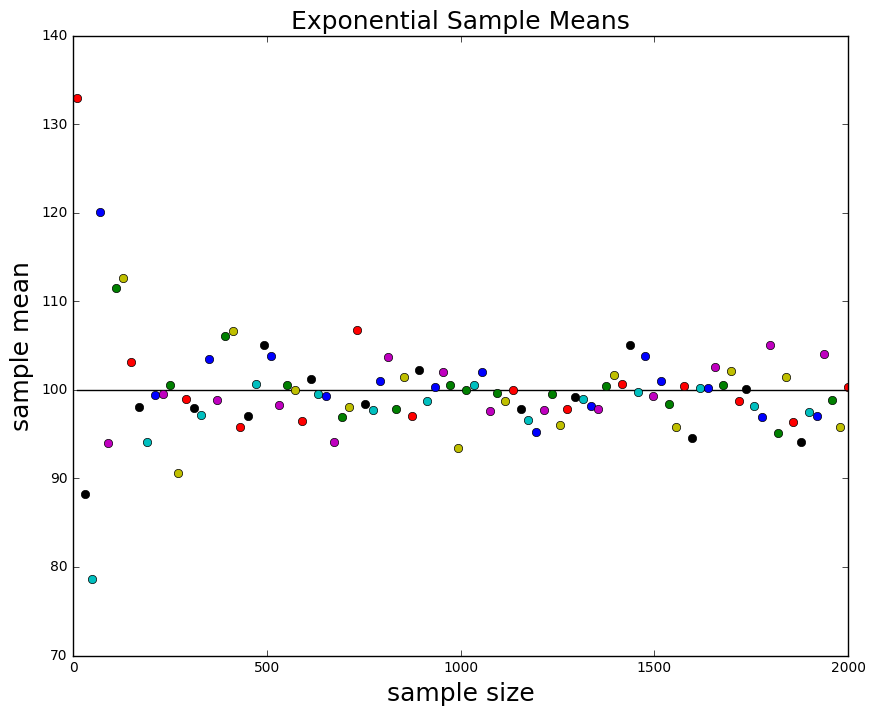

In [29]:
md['exponential'] = {} 

for x in sizeArray:
    md['exponential'][x] = np.random.exponential(scale, size = x)
       

md['exponential']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,8)).add_subplot(111)
axchisq_mu_n.set_title('Exponential Sample Means', fontsize=18)
axchisq_mu_n.plot([min(sizeArray), max(sizeArray)], [scale,scale], 'k')
for xx in md['exponential']:
    if not type(xx) == str:
        md['exponential']['means'][xx] = md['exponential'][xx].mean()
        axchisq_mu_n.plot(xx, md['exponential']['means'][xx], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)

## FIgure E2: Sample means of Exponential Distribution

## From the figure we can see the sample mean is getting close to 100, which is the mean of the poisson distribution we set before, as the sample size is getting larger. It is in accord with the law of large numbers.

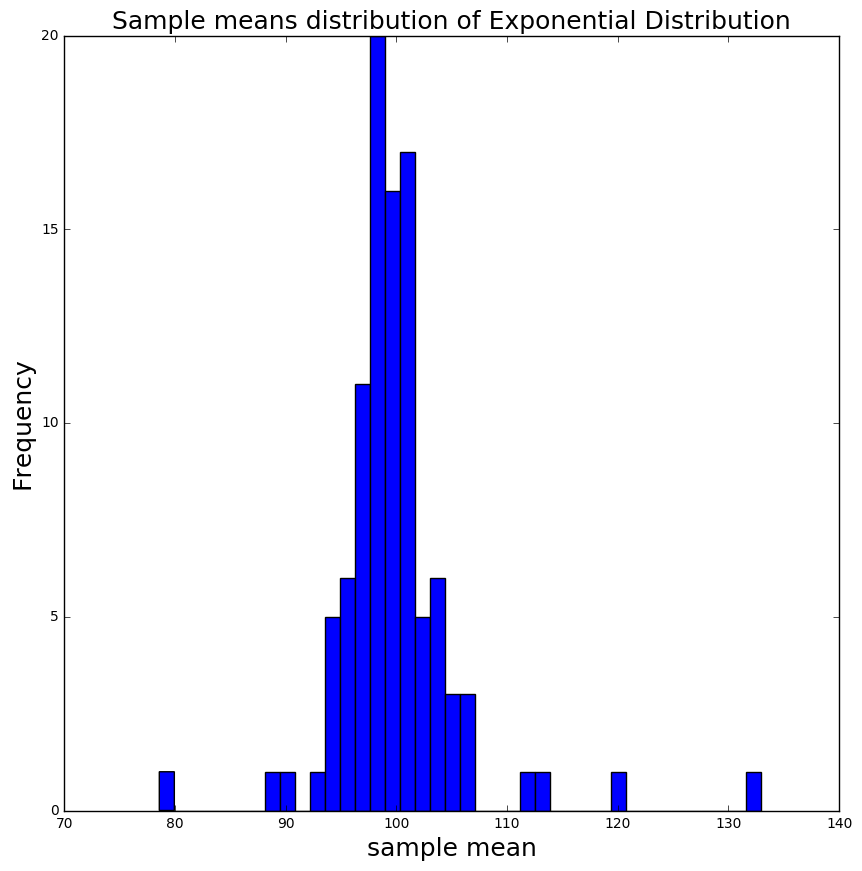

In [30]:
allmeans = list(md['exponential']['means'].values())
e_allmeans = allmeans

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of Exponential Distribution', fontsize=18)

## Figure E3: Sample means distribution of Exponential Distribution

## From the distribution figure of sample means, we can see it is closed to a normal distribution.  According to the Central Limit Theorem, the distribution of the mean of a large number of independent,  identically distributed variables will be approximately normal, we conclude our experiment is in compliance with Central Limit Theorem.

In [31]:
Allmeans = c_allmeans + n_allmeans + p_allmeans + b_allmeans + e_allmeans


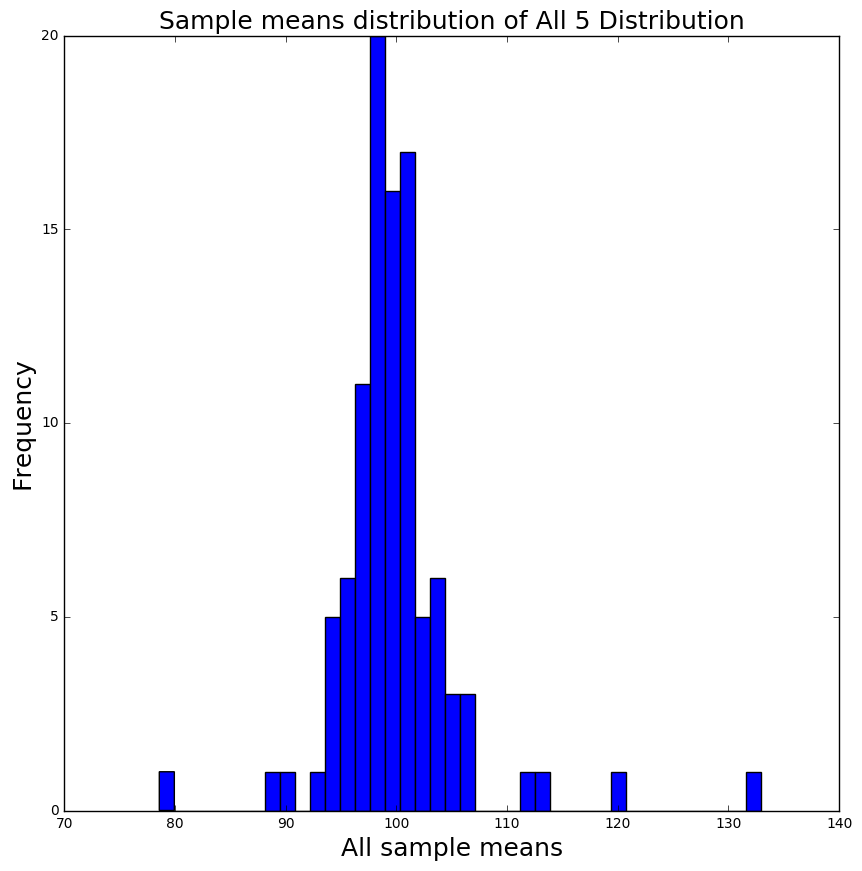

In [32]:
pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=40)
pl.xlabel('All sample means', fontsize = 18)
pl.ylabel('Frequency', fontsize = 18)
pl.title('Sample means distribution of All 5 Distribution', fontsize=18)

## Figure **: Sample means distribution of All 5 Distribution

## As Central Limit Theorem states, the distribution of different sample means converges normal distribution as 